In [1]:
from IPython.core.display import HTML

HTML("""
<style>
    p {
        font-size: 1.2em;
        line-height: 1.5em;
    }
</style>
""")

# Probability
## Introduction
As the saying goes, invention is the mother of necessity, and developments in mathematics have been no exception.  Geometry is believed to have born from practical needs in architecture, surveying, and astronomy.  Similarly, algebra was likely the product of symbolically abstracting geometric relationships and commerce computations.  Probability on the other hand, had more questionable origins in a common human vice, namely, gambling!

In this notebook, we'll cover the basics of probability theory and then look at some common distributions and how they are applicable in Data Science.  The breakdown will be as follows:

- Bernoulli Random Variables
- Expectation Values and Variance
- Conditional Probability
- Distribution Tails
- Common Distributions:
 - Binomial
 - Poisson
 - Normal
 - Mutlivariate Gaussian
 - Exponential
 - Log-Normal

It is also important to distinguish *probability* from *statistics*, although the two are closely related.  Probability tends to be a theoretical framework for performing calculations on *random variables* whereas *statistics* is using the models provided from probability to draw inferences from real-world data.  For example, probability provides the mathematics to desribe the outcome of a die roll while statistics can answer the question of whether or not our die is [loaded](https://www.wikihow.com/Load-Dice).

# Bernoulli Random Variables
The simplest probabilistic model is the case of a binary variable, taking values of 0 or 1, having probability denoted $p$ and $1-p$ respectively.  An outcome having these properties is said to be a *Bernoulli Random Variable*, a simple example being a coin flip.

Consider the below bar-chart of the outcome of 100 coin flips.

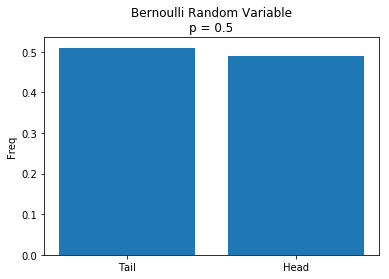

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Compute
np.random.seed(0)
X = np.random.binomial(n = 1, p = 0.5, size = 100)
counts = np.bincount(X)

# Plot
plt.bar(x = range(len(counts)), height = counts/len(X), align = 'center')
plt.title('Bernoulli Random Variable\np = 0.5')
plt.ylabel('Freq')
plt.xticks([0, 1], ['Tail', 'Head'])
plt.show()

The above shows that about half of the outcomes were heads and the tails which is exactly what we would expect if the coin was unbiased.  If we want to model a slightly head-biased coin, we can adjust the $p$ parameter, producing the following.

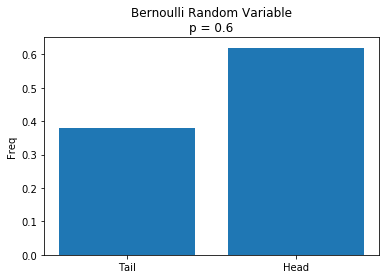

In [2]:
# Compute
np.random.seed(0)
X = np.random.binomial(n = 1, p = 0.6, size = 100)
counts = np.bincount(X)

# Plot
plt.bar(x = range(len(counts)), height = counts/len(X), align = 'center')
plt.title('Bernoulli Random Variable\np = 0.6')
plt.ylabel('Freq')
plt.xticks([0, 1], ['Tail', 'Head'])
plt.show()

The outcome is now slightly biased toward heads.

**Now suppose you've been told that you'll recieve `$`5 for each tails and lose `$`2 for each head using our biased coin as above.  Should you play this game?**

*The payout can be computed by*

$$E[X] = hp + t(1-p)$$

*whehre h is te payout for heads and t is the payout for tails.  Then*

In [3]:
-2*0.6 + 5*(1-0.6)

0.8

*Yes, you should play this game as the payout is greater than 0.*

The plots above are referred to as the *probability mass function* since they (empirically in our case) represent the probability of obtaining each outcome.  Note that the probability of each outcome *must* add to one.

You may notice that our outcomes here are represented by non-negative, finite, whole numbers.  Such a *random variable* is called *discrete* as opposed to *continuous* which we shall examine in the next section.

*Assume the same payout and distribution as above and compute the result by simulating an actual coin toss for many different number of tosses.  Are the results the same?  Comment and plot your results.*

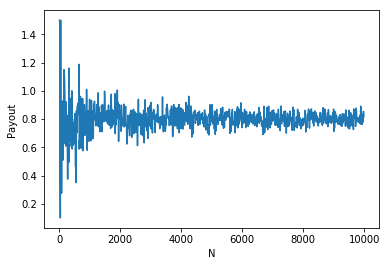

In [4]:
# Compute outcomes
np.random.seed(0)
N = 10000

payouts = []
for s in np.arange(10, N, 10):
    X = np.random.binomial(n = 1, p = 0.6, size = s)
    count = np.bincount(X)
    payout = count/len(X) * np.array([5, -2])
    payouts.append(np.sum(payout))

# Plot
plt.plot(np.arange(10, N, 10), payouts)
plt.xlabel('N')
plt.ylabel('Payout')
plt.show()

*The theoretical value computed about was 0.8.  As we can see from the plot, as the number of flips increases, the actual payout zeros in on the theoretical value.*

## Continuous versus Discrete: The Uniform Distribution
Just as we started with the simplest of distributions for the discrete case, we will do the same for continuous.  What distinguishes a discrete random variable from a continuous is that a continuous variable can take on *any* value as opposed to just finite non-negative whole numbers.

To illustrate this, consider a lottery in which a computer draws a random real number between -1 and 1.  Our previous analysis will not work here since we have not only negative values, but also non-whole numbers as well.  As before, let's plot an empirical distribution and take a look.

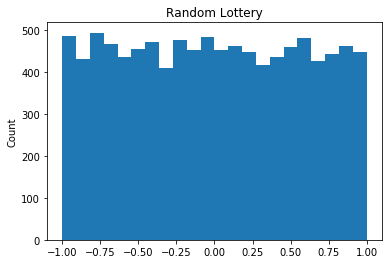

In [5]:
# Generate random numbers on the interval -1 to 1
# Compute
np.random.seed(0)

a = -1
b = 1
X = (b - a) * np.random.sample(10000) + a

# Plot
plt.hist(X, bins = 'auto')
plt.title('Random Lottery')
plt.ylabel('Count')
plt.show()

As can be seen above, the distribution appears to be approximately uniform accross the inveral $[0, 1]$, and is thus the appropriately named *Uniform Distribution*.  Stated mathematically

$$f(x)=\begin{cases}
  \frac{1}{b - a} & \mathrm{for}\ a \le x \le b, \\[8pt]
  0 & \mathrm{for}\ x<a\ \mathrm{or}\ x>b
  \end{cases}$$
  
Where $a$ and $b$ are on some interval in which $b > a$.  The above is referred to as *Probability Density Function*, or $PDF$ of the uniform distribution over $[a, b]$ denoted $unif(a, b)$, and are the continous analogy of the discrete's *probability mass function*.  As with the discrete case, there are some constraints on a valid PDF, namely

- $f(x)$ is never negative
- $\int f(x) dx = 1$

in otherwords, the probability must never be negative (clearly) and must always add up to one.  The actual $PDF$ $unif(0, 1)$ looks like the following.

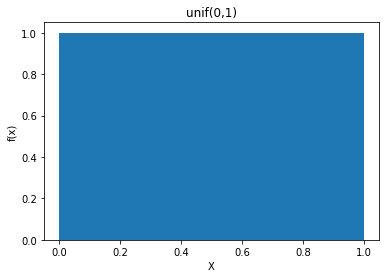

In [6]:
a = 0
b = 1

X = [a]
y = [1/(b - a)]

plt.bar(x = X, height = y, width = b - a, align = 'edge')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('unif(0,1)')
plt.show()

Also of interest is the *Cumulative Distribution Function* or $CDF$.  The $CDF$ represents the probability of finding a value less than or equal to a given $x$.  Stated mathematically

$$F_X(x) = \operatorname{P}(X\leq x)$$
where
$$F_X(x) = \int_{-\infty}^x f_X(t)\,dt$$

Typically, our $PDF$ is denoted $f(X)$ and our $CDF$ as $F(X)$ as seen above.  Depending on the circumstance, it may be easier to work with a $CDF$ than a $PDF$ so it is important to keep both of these tools at your disposal.  For the uniform distribution, the $CDF$ mathematically is

$$F(x)= \begin{cases}
  0 & \text{for }x < a \\[8pt]
  \frac{x-a}{b-a} & \text{for }a \le x \le b \\[8pt]
  1 & \text{for }x > b
  \end{cases}$$
  
or graphically, for our $unif(0,1)$, as

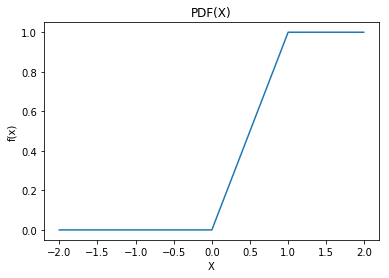

In [7]:
a = 0
b = 1

X = np.arange(-2, 2, 0.01)
y = [0 if x < a else 1 if x > b else (x-a)/(b-a) for x in X]

plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('PDF(X)')
plt.show()

**Reproduce the $pdf(X)$ and $CDF(X)$ as above but on the interval $[-1, 1]$ and then generate random data points from the same distributions, plotting them and computing the total area under the curve.  Comment on your results.**

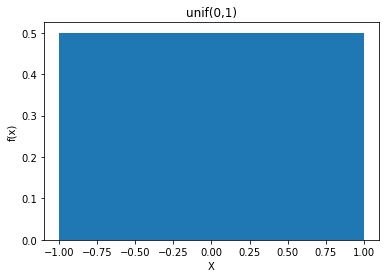

Area: 1.0


In [8]:
a = -1
b = 1

# Compute pdf
X = [a]
y = [1/(b - a)]

# Plot
plt.bar(x = X, height = y, width = b - a, align = 'edge')
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('unif(0,1)')
plt.show()

# Area under curve
area = (1 - (X[0]))*(y[0] - 0)
print('Area: ' + str(area))

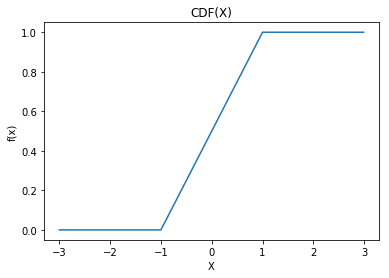

In [9]:
# Compute CDF
X = np.arange(-3, 3, 0.01)
y = [0 if x < a else 1 if x > b else (x-a)/(b-a) for x in X]

plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('CDF(X)')
plt.show()

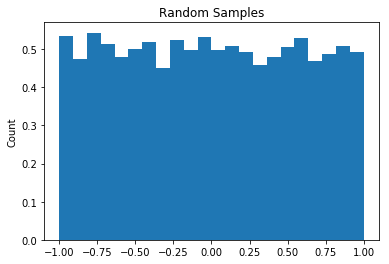

Area: 1.0


In [10]:
np.random.seed(0)

a = -1
b = 1
X = (b - a) * np.random.sample(10000) + a

# Plot
plt.hist(X, bins = 'auto', density = True)
plt.title('Random Samples')
plt.ylabel('Count')
plt.show()

# Area under curve
values, bins, _ = plt.hist(X, bins = 'auto', density = True)
area = sum(np.diff(bins)*values)
print('Area: ' + str(area))

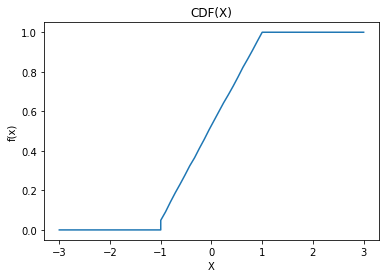

In [38]:
# Compute CDF
X_a = [float(x) for x in np.linspace(-3, a, 100)]
X_b = [float(x) for x in np.linspace(b + 0.01, 3, 100)]
X = X_a + [float(x) for x in np.linspace(a, b, len(values))] + X_b

y_a = [float(y) for y in np.repeat(0, 100)] 
y_b = [float(y) for y in np.repeat(1, 100)]
y = y_a + [float(y) for y in np.cumsum(np.diff(bins)*values)] + y_b
 
plt.plot(X, y)
plt.xlabel('X')
plt.ylabel('f(x)')
plt.title('CDF(X)')
plt.show()

*The area under the curve is 1 in both cases as it should be.  In the histogram this is due to setting `density=True`.*

As an important side-note, you may encounter a situation when dealing with real-world data in which your distribution cannot be modeled entirely using discrete or continuous models alone.  In such a case, you may find yourself introducing a *joint $PDF$*.

Consider the heights of all crops in a field for example, both sprouted and unsprouted.  If we find that many of the crops have not sprouted, then we will have a very sharp spike at $x = 0$ as illustrated in the following.

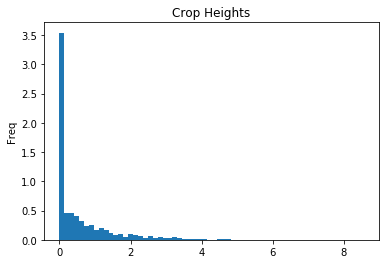

In [12]:
# Get random heights
np.random.seed(0)
heights = np.random.exponential(size = 1000)
heights = np.append(heights, np.zeros(700))

# Plot histogram
plt.hist(heights, bins = 'auto', density = True)
plt.title('Crop Heights')
plt.ylabel('Freq')
plt.show()

As can be seen, the sharp spike at 0 really hides the structure of the rest of the histogram.  A better approach, is to remove these values from the data, and indicate with a pie-chart the portion of zeros in the data.

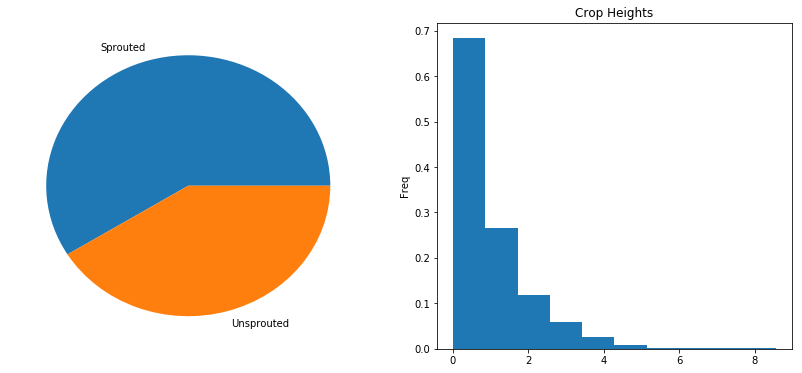

In [13]:
counts = np.bincount(heights == 0)
plt.figure(figsize = (14,6))
plt.subplot(1, 2, 1)
plt.pie(counts, labels = ['Sprouted', 'Unsprouted'])

plt.subplot(1, 2, 2)
plt.title('Crop Heights')
plt.ylabel('Freq')
plt.hist(heights[heights != 0], density = True)

plt.show()

Which illustrates much more clearly the distribution of the actual sprouted trees in addition to the portion that are part of the spike at 0.

## Expectation Values and Variance
So far we have just examined the distributions associated with random variables, but what other characteristic properties do they have?  Since we know that a random variable can take on many different values, it seems reasonable to take a look at the *average*, or *expected value*, of $X$ denoted $E[X]$.  If you were given the list `[1, 2, 3, 4, 5]` and asked to compute the average, you would simply add all the values up and divide by the total yielding

In [14]:
X = [1, 2, 3, 4, 5]
print('Average: ' + str(sum(X)/len(X)))

Average: 3.0


We can easily extend this concept to any discrete $PMF$ stated mathematically (note this isn't very rigorous!)

$$ \operatorname{E}[X] = \sum_{i} x_i p_i = x_1p_1 + x_2p_2 + \cdots + x_kp_k$$

where each $x_i$ is an outcome with associated probability $p_i$.  This is again extends very easily to the continuous case by simply changing the summation to an integral (eliminating the mathematical rigor once more)

$$\operatorname{E}[X] = \int x f(x)\, dx$$

where $f(x)$ is the $PDF$ of random variable $X$.  And even more generally, a *function* of a random variable can have an associated expectation value, namely

$$\operatorname{E}[g(X)] = \int g(x) f(x)\, dx$$

And this same logic can be applied to discrete variables as well.

Say we also wanted to have some information about the "range" or "spread" of our random variable.  A naive way may be to just subtract the smallest from the largest giving us the range of values $X$ is spread over.  This method however, gives us no information about the "clustering" in our data.  Instead, we can compute the variance found by

$$\operatorname{Var}(X) = \sum_{i=1}^n p_i\cdot(x_i - \mu)^2$$

or in the continuous case

\begin{align}
   \operatorname{Var}(X) = \sigma^2 &= \int (x-\mu)^2 f(x) \, dx \\
     &= \int x^2f(x)\,dx -2\mu\int xf(x)\,dx + \int \mu^2 f(x)\,dx \\
     &= \int x^2 f(x)\,dx - \mu^2
 \end{align}

where $\mu$ is the mean or average.  If you take a close look at the final line in the continuous case, you'll notice that we can actually rewrite this as

$$\begin{align} \int x^2 f(x)\,dx - \mu^2 =
&= \operatorname{E}\left[(X - \operatorname{E}[X])^2\right] \\
&= \operatorname{E}\left[X^2 - 2X\operatorname{E}[X] + \operatorname{E}[X]^2\right] \\
&= \operatorname{E}\left[X^2\right] - 2\operatorname{E}[X]\operatorname{E}[X] + \operatorname{E}[X]^2 \\
&= \operatorname{E}\left[X^2 \right] - \operatorname{E}[X]^2
\end{align}$$

where we can see that we can write the variance as the expectation value as the square of the difference of each outcome from the mean which turns out is the same as taking the difference between $E[X^2]$ and $E[X]^2$.  This is a very handly relation to remember as it comes up *very* frequently in statistics.  And lastly, instead of looking at variance, you will frequently examine the *standard deviation* which is just the square root of the variance.

$$\sigma_x = \sqrt{Var[X]}$$

The standard deviation can be thought of as typically how far a value of the random variable is from the mean, or the spread of the variable -- the larger the variance, the less clustering about the mean.

**Compute theoretical mean and variance for a Bernoulli Random Variable with p = 0.5, as well as a Uniform Distribution on the interval [0, 1].  Then generate some random data, computing the same quantities.  Comment on your results.**

*The expectation value for a Bernoulli Random variable with $p = 0.5$ can be computed by*

$$\operatorname{E}[X] = \sum_{i} x_i p_i = (0)(0.5) + (1)(0.5) = 0.5$$

*And now the variance*

$$\operatorname{E}[X^2] = \sum_{i} x_i^2 p_i = (1^2)(p) + (0^2)(1-p) = p$$
$$Var[X] = E[X^2] - E[X]^2 = p - p^2 = p(1-p) = 0.5(1 - 0.5) = 0.25$$

*And for the $unif(0, 1)$*

$$\operatorname{E}[X] = \int x f(x)\, dx = \int x \frac{1}{b-a} dx = \frac{1}{2}\frac{1}{b-a}\left[x^2\right]_a^b = \frac{b^2 + a^2}{2} = \frac{1+0}{2} = \frac{1}{2}$$

*And the variance*

$$\operatorname{E}[X^2] = \int x^2 f(x)\, dx = \int x^2 \frac{1}{b-a} dx = \frac{1}{3}\frac{1}{b-a}\left[x^3\right]_a^b = \frac{a^2 + ab + b^2}{3}$$
$$Var[X] = E[X^2] - E[X]^2 = \frac{a^2 + ab + b^2}{3} - \frac{b^2 + a^2}{2}^2 = \frac{(b-a)^2}{12} = \frac{1}{12}$$

*And now to calculate with some actual data.*

In [15]:
# Generate random data
np.random.seed(0)
X_b = np.random.binomial(n = 1, p = 0.5, size = 10000)
X_u = np.random.rand(10000)

# Compute mean and variance
print('Mean Bernoulli: ' + str(X_b.mean()))
print('Variance Bernoulli: ' + str(X_b.var()))
print('Mean Uniform: ' + str(X_u.mean()))
print('Variance Uniform: ' + str(X_u.var()))

Mean Bernoulli: 0.4936
Variance Bernoulli: 0.24995904
Mean Uniform: 0.495239621185
Variance Uniform: 0.0848500026508


*Both the theoretical and empirical values are close as they should be.*

## Conditional Probability
An important topic to touch on here is that of *Conditional Probability* which has widespread application in Data Science in the context of Bayesian Statistics which we will cover later.  So far we have only considered on independent event, a roll of a die for example.  Clearly if we were to roll two dice, then we could still say that each roll was independent since each roll does not effect the outcome of the other.  What if, however, we considered the sum of both dice $D1 + D2$?  That is, what could we say about the probability of the state of $D1$ given the sum of $D1$ and $D2$ is $4$?  With some quick thought, we immediately know that $D2$ cannot be more than $3$.  This means, in short, that knowledge of the state of one random variable ($D1 + D2$) gives us some information regarding the state of our independent variables ($D1$ and $D2$).

To elaborate on this, consider the following table representing all possible outcomes of the roll of two dice.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>1</th>      <th>2</th>      <th>3</th>      <th>4</th>      <th>5</th>      <th>6</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>2</td>      <td>3</td>      <td>4</td>      <td>5</td>      <td>6</td>      <td>7</td>    </tr>    <tr>      <th>2</th>      <td>3</td>      <td>4</td>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>    </tr>    <tr>      <th>3</th>      <td>4</td>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>    </tr>    <tr>      <th>4</th>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>    </tr>    <tr>      <th>5</th>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>      <td>11</td>    </tr>    <tr>      <th>6</th>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>      <td>11</td>      <td>12</td>    </tr>  </tbody></table>

Where $D1$ is on the horizontal and $D2$ on the vertical.  If we know that sum $D1 + D2$ is less than 4, then only the following possibilities for $D1$ and $D2$ are allowed.

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>1</th>      <th>2</th>      <th>3</th>      <th>4</th>      <th>5</th>      <th>6</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>***2***</td>      <td>***3***</td>      <td>***4***</td>      <td>5</td>      <td>6</td>      <td>7</td>    </tr>    <tr>      <th>***2***</th>      <td>***3***</td>      <td>***4***</td>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>    </tr>    <tr>      <th>***3***</th>      <td>***4***</td>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>    </tr>    <tr>      <th>4</th>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>    </tr>    <tr>      <th>5</th>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>      <td>11</td>    </tr>    <tr>      <th>6</th>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>      <td>11</td>      <td>12</td>    </tr>  </tbody></table>

Immediately we know that only 6 combinations of the total 36 are possible, thus $P(D1 + D2 \le 4) = \frac{1}{6}$.  But what if we wanted to ask the question, what is the probability of $D1 = 1$ given that $D1 + D2 = 4$?  Examining the table we find that

<table border="1" class="dataframe">  <thead>    <tr style="text-align: right;">      <th></th>      <th>1</th>      <th>2</th>      <th>3</th>      <th>4</th>      <th>5</th>      <th>6</th>    </tr>  </thead>  <tbody>    <tr>      <th>1</th>      <td>***2***</td>      <td>*3*</td>      <td>*4*</td>      <td>5</td>      <td>6</td>      <td>7</td>    </tr>    <tr>      <th>***2***</th>      <td>***3***</td>      <td>*4*</td>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>    </tr>    <tr>      <th>***3***</th>      <td>***4***</td>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>    </tr>    <tr>      <th>4</th>      <td>5</td>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>    </tr>    <tr>      <th>5</th>      <td>6</td>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>      <td>11</td>    </tr>    <tr>      <th>6</th>      <td>7</td>      <td>8</td>      <td>9</td>      <td>10</td>      <td>11</td>      <td>12</td>    </tr>  </tbody></table>

And only 3 combinations are allowed, but remember that we are considering only a small subset of all the possibilities, namely, the subset we considered when asking $P(D1 + D2 \le 4)$ in which there were only 6.  Therefore, $P(D1 + D2 \le 4\mid D1 = 1) = \frac{3}{6} = \frac{1}{2}$.

The last example is the heart of conditional probability.  With a little thought, you can see that the mathematical relationship defining it must be

$$P(A|B)=\tfrac{P(A \cap B)}{P(B)}$$

Where $A \cap B$ is the intersection of $A$ and $B$.  In our example above, $A$ is where $D1 = 1$ and $B$ is all rolls which add to 4.  Thus

$$P(A|B)=\tfrac{P(A \cap B)}{P(B)} = \frac{3/36}{6/36} = \frac{1}{2}$$

Which is consistent with what is in the table.

**Determine the probability that $D2$ is less than or equal to 4, given that $D1 + D2$ is less than or equal to 10.  In other words, compute $P(D2 \le 4\mid D1 + D2 \le 10)$**

*There are total of 24 ways in which $D2 \le 4$ and 33 ways in which $D1 + D2 \le 10$ therefore*

In [16]:
24/33

0.7272727272727273

## Distribution Tails
Before jumping into many of the common distributions you'll encounter as a Data Scientist, there is one more topic to touch on, namely, distribution tails.

A distribution's tail refers to its extreme high and low ends.  Many distributions, such as the Normal, or Bell Curve, die out, or collapse to 0, on the high and low ends, whereas others are *heavy tailed* and tend to remain well above zero until very very far out.  Both phenomena appear the real world and it is very important to take tail behavior into consideration when constructing a model.  Human height, for example, does not exhibit a heavy tail as you are not going to find any 15 foot people, but wealth distribution on the other hand, typically does require a heavy tail as there are some people who are in the billionaire club, placing them *significantly* above the mean.

To illustrate this, consider the PDF of a Guassian distribution which is *not* heavy tailed.

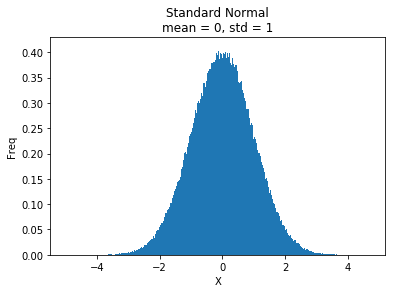

In [17]:
np.random.seed(0)
X_norm = np.random.randn(1000000)

plt.hist(X_norm, density = True, bins = 1000)
plt.title('Standard Normal\nmean = 0, std = 1')
plt.xlabel('X')
plt.ylabel('Freq')
plt.show()

As can be seen, this doesn't exhibit the heavy tail discussed above.  Now let's take an average of the first `n` samples and plot them.

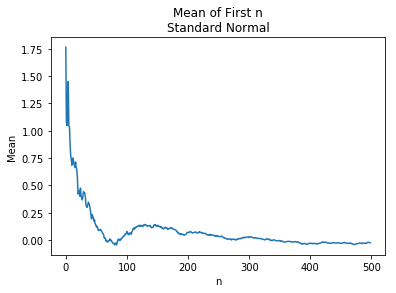

In [18]:
means = [X_norm[:n].mean() for n in range(1, 500)]

plt.plot(means)
plt.title('Mean of First n\nStandard Normal')
plt.xlabel('n')
plt.ylabel('Mean')
plt.show()

As can be seen, the average quickly converges to a value of about 0 after around 200 samples.  Now let's take a look at a similar, but every different distribution called the Student's t-distribution.

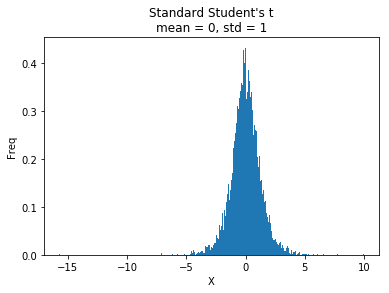

In [19]:
np.random.seed(0)
X_t = np.random.standard_t(df = 5, size = 10000)

plt.hist(X_t, density = True, bins = 500)
plt.title('Standard Student\'s t\nmean = 0, std = 1')
plt.xlabel('X')
plt.ylabel('Freq')
plt.show()

The Student's t-distribution appears looks somewhat similar to the normal distribution, but when plotted on the same scale, it is narrower, indicating some outliers on the tail ends.  Now let's see what happens when we plot the means as before.

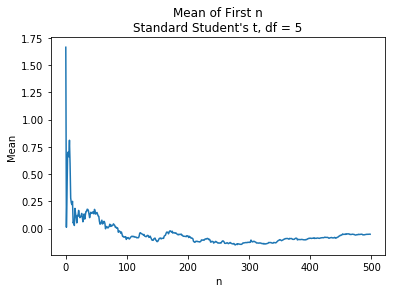

In [20]:
means = [X_t[:n].mean() for n in range(1, 500)]

plt.plot(means)
plt.title('Mean of First n\nStandard Student\'s t, df = 5')
plt.xlabel('n')
plt.ylabel('Mean')
plt.show()

As can be seen, although the distribution looks very similar to the normal, the heavy tail means that there are a large amount of outliers which contribute every once in awhile to mean, causing it to fluctuate quite a bit, indicating that many statistics (such as the mean) are likely to be affected by this heavy tail behaivor.  In our two cases here for example, the means of the first 500 values are 

In [21]:
print('Mean Normal: ' + str(X_norm[:500].mean()))
print('Mean Student\'s t: ' + str(X_t[:500].mean()))

Mean Normal: -0.0253544393324
Mean Student's t: -0.0510224315736


When the distributions were constructed, their means were set to be 0, and as can be seen, the Student's t-distrbution is a good deal further away from that mean after 500 samples.  In such cases, it is often better to look at the *median* for heavy tailed distributions since the *median* is a bit more robust to outliers.

**What are some examples of phenomona which you expect would be heavy tailed?  What about ones which are not?**

*Many resource gathering and distribution phenomenon exhibit heavy tails such as*
- *The top 1% owns nearly 40% of the wealth*
- *The top 2% of Twitter users are responsible for nearly 60% of tweets*
- *The square root of number of publishing scientists in a given field are responsible for approximately half of all publications*

*Many other examples of human activities show this sort of behaivor.  On the other hand, many natural phenomenon are not heavy tailed such as*
- *Height distribution in any population*
- *The mean of any dice roll or, more generally, any random event*
- *Any phenomenon that shows expondential decay such as heat transfer*

## Probability Distributions
Now that we have established a general conceptual framework for the language and methods of probability theory, we can get to the most important topic of this notebook and show some common distributions you'll work with as a Data Scientist.  As we work through these, you should make effort to remember three things about each distribution:
1. A particular phenomonon it is associated with.  Normal Distribution goes with height for example.
1. The parameters that define the distribution.  A Normal Distribution is defined by mean and variance alone for example.
1. Whether or not a distribution is heavy-tailed.  As stated before, the Normal Distribution is **not** heavy-tailed.

There are of course many more distributions than we'll touch on here, but this should provide a general overview of some of the important ones.

### The Binomial Distribution
Whether you realized it or not, we have in fact already worked with the Binomail Distribution when discussing Bernoulli Random Variables.  The only difference here is that the Binomial Distribution is generalized to encorporate many outcomes with $PMF$

$$P(k;n,p) = P(X = k) = {n\choose k}p^k(1-p)^{n-k}$$

where parameters $n$, $p$, and $k$ are defined as follows
- **n**: The number of trials
- **p**: The probability of sucess (0.5 in a coin toss)
- **k**: The number of sucessful outcomes

and

$$\binom n k =\frac{n!}{k!(n-k)!}$$

is the [Binomial Coefficent](https://en.wikipedia.org/wiki/Binomial_coefficient) (hence the name) and is pronounced "n choose k".  Where

$$x! = (x)(x-1)(x-2)\dots(2)(1)$$

and is pronounced "x factorial".  Also of note is the mean, $\mu$, and variance, $\sigma^2$, of the Binomail Distribution which we will simply state here, omitting the derivation.
- $\mu = np$
- $\sigma^2 = np(1-p)$

We can sample from a Binomial and plot the results with the following.

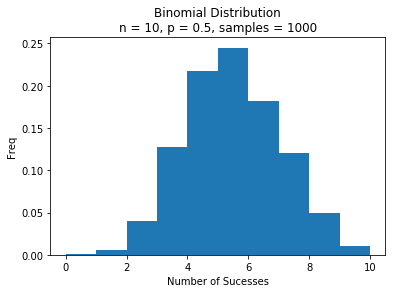

In [22]:
np.random.seed(0)
X = np.random.binomial(n = 10, p = 0.5, size = 1000)

plt.hist(X, density = True, bins = 10)
plt.title('Binomial Distribution\nn = 10, p = 0.5, samples = 1000')
plt.xlabel('Number of Sucesses')
plt.ylabel('Freq')
plt.show()

As we can see, the most frequent outcome after 1000 samples of the flip of 10 fair coins is 5 as expected from the mean above.

**Create the same PMF as above but for this time using the roll of a single die where sucess is having the outcome be a 1 out of 6 rolls.  Then repeat the same for the sum of roll of two dice where sucess is the outcome being 6 out of 12 rolls.**

*Since our sucessful outcome has a probability of occuring $\frac{1}{6}$ of the time, then*

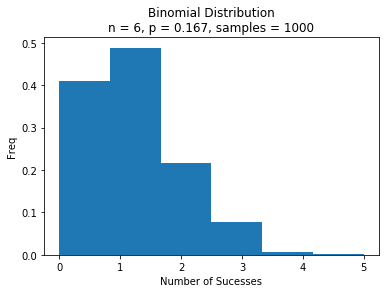

In [23]:
np.random.seed(0)
X = np.random.binomial(n = 6, p = 1/6, size = 1000)

plt.hist(X, density = True, bins = 6)
plt.title('Binomial Distribution\nn = 6, p = 0.167, samples = 1000')
plt.xlabel('Number of Sucesses')
plt.ylabel('Freq')
plt.show()

*Which shows the most likely outcome is having 1 success which makes sense for the roll of a die six times.  Now for the case of two die, we must consider the probability of them summing to 6.  Since there are 5 ways to obtain a sum of 6, $p = 5/36 = 0.14$ so the $PMF$ is*

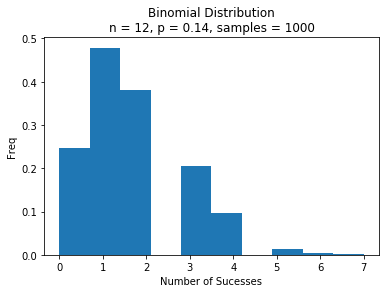

In [24]:
np.random.seed(0)
X = np.random.binomial(n = 12, p = 5/36, size = 1000)

plt.hist(X, density = True)
plt.title('Binomial Distribution\nn = 12, p = 0.14, samples = 1000')
plt.xlabel('Number of Sucesses')
plt.ylabel('Freq')
plt.show()

*We can see that out of 12 rolls, we are most likely to obtain a sum of 6 once which occurs a little less than half the time.*

**Answer the following:**
1. **What is a phenomenon associated with the Binomial Distribution?**
1. **What are the parameters?**
1. **Is it heavy tailed?**

1. *A coin flip or roll of dice.*
1. *The parameters are:*
  - **n**: *The number of trials*
  - **p**: *The probability of sucess (0.5 in a coin toss)*
  - **k**: *The number of sucessful outcomes*
1. *No*

### The Poisson Distribution
Next up is the Poisson Distribution which is used to measure how many events occur in a given amount of time.  In particular, the Poission Distribution is good for modelelling phenomonon in which many events are possible, but only a small number will occur.  The number of visitors to a particular website is a good example, since from a pool of millions of internet users, only a small fraction will visit a website on a given day.

To build some intuition about how it is derived, consider a Binomial Distribution in which $n$ is *very* large and $p$ is *very* small so that $np$ is equal to some constant, namely

$$np = \lambda$$

In the limit of large $n$ and small $p$, the Binomail converges to a Poisson with $PMF$ given by

$$P(k) = e^{-\lambda}\frac{\lambda^k}{k!}$$

where 
- $\lambda$ is the event parameter
- k is the number of events in the time interval.

The Poisson also has mean and variance defined by
- $\mu = \lambda$
- $\sigma^2 = \lambda$

We can sample from a Poisson and plot the results with the following.

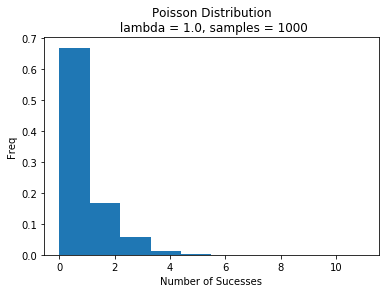

In [25]:
np.random.seed(0)
X = np.random.poisson(lam=1.0, size=1000000)

plt.hist(X, density = True)
plt.title('Poisson Distribution\n lambda = 1.0, samples = 1000')
plt.xlabel('Number of Sucesses')
plt.ylabel('Freq')
plt.show()

As we can see, with an event rate of 1, the most likely number of occurances is 1 with about 0.65 and then 2 at a probability of about 0.2.

Furthermore, it is important to keep the following assumptions in mind when using the Poisson

- $k$ is the number of times an event occurs in an interval and $k$ can take values 0, 1, 2, ….
- The occurrence of one event does not affect the probability that a second event will occur. That is, events occur independently.
- The rate at which events occur is constant. The rate cannot be higher in some intervals and lower in other intervals.
- Two events cannot occur at exactly the same instant; instead, at each very small sub-interval exactly one event either occurs or does not occur.
- The probability of an event in a small sub-interval is proportional to the length of the sub-interval.

**Suppose you have stats on a basketball and find that the average score per team per game is about 100.  Using a Poisson distribution, compute the probability of scoring 35 points or more in a given quarter.**

*Here our event rate per quarter is $\lambda = 100/4 = 25$.  So throwing this into a Poisson distribution yields*

In [26]:
from scipy.stats import poisson

# Compute the right hand side of the CDF
1 - poisson(mu = 25).cdf(35)

0.022458085745870493

**Answer the following:**
1. **What is a phenomenon associated with the Poisson Distribution?**
1. **What are the parameters?**
1. **Is it heavy tailed?**

1. *The number of patients admitted to an emergency room in a given time period*
1. *The parameters are:*
  - **$\lambda$**: The event rate.
  - **k**: *The number of events*
1. *No*

### The Normal Distribution
Perhaps the most common distribution you'll encounter is the Normal, or Gaussian, Distribution.  This iconic bell-shaped curve pops up in virtually all mathematical disciplines and for very good reason.

It turns out that averaging samples from *any* distribution, with finite mean and variance, eventually converges to a normal distribution.  This is true for all the ditributions we have seen thus far and virtually all you will encounter.  This is known as *The Central Limit Theorem*, stated mathematically:

$$\sqrt{n}\left(\frac{1}{n}\sum_{i=1}^n X_i - \mu \right) \xrightarrow\ N\left(0,\sigma^2\right)$$

This concept is central to probability theory and statistics so it is important to keep it in mind.

In terms of properties, the Normal Distribution defined by mean and variance alone and exhibits clustering about the mean with light tails, with $PDF$

$$f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}$$

where $\mu$ is the mean, and $\sigma^2$ is the variance.  Taking the shape

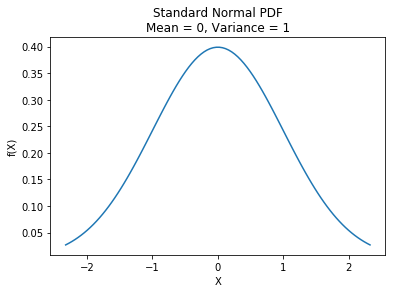

In [27]:
from scipy.stats import norm

X = np.linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
rv = norm()
plt.plot(X, rv.pdf(X))
plt.title('Standard Normal PDF\nMean = 0, Variance = 1')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.show()

**Draw random samples from a normal distribution with mean 100 and standard deviation 25, plot the histogram and answer the following.**
1. **Compute the probability of $X$ being less than or equal to one standard deviation to the left of the mean.**
1. **Compute the probability of $X$ being greater than or equal to one standard deviation to the right of the mean.**
1. **Compute the probability of $X$ being greater than one standard deviation from the mean on the left and less than one standard deviation from the mean on the right.**

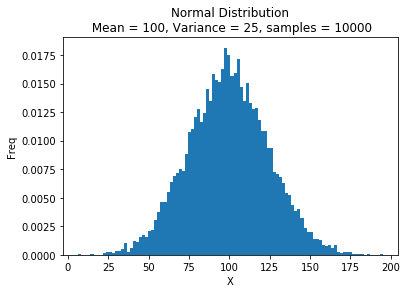

In [28]:
# Generate random samples
np.random.seed(0)
X = np.random.normal(loc = 100, scale = 25, size = 10000)

# Plot
plt.hist(X, density = True, bins = 100)
plt.title('Normal Distribution\n Mean = 100, Variance = 25, samples = 10000')
plt.xlabel('X')
plt.ylabel('Freq')
plt.show()

In [29]:
part_1 = norm.cdf(100 - 25, loc = 100, scale = 25)
part_2 = 1 - norm.cdf(100 + 25, loc = 100, scale = 25)
part_3 = 1 - (part_1 + part_2)

print('P(X) <= 1 STD left: ' + str(part_1))
print('P(X) >= 1 STD right: ' + str(part_2))
print('P(X) 1 STD middle: ' + str(part_3))

P(X) <= 1 STD left: 0.158655253931
P(X) >= 1 STD right: 0.158655253931
P(X) 1 STD middle: 0.682689492137


**Demonstrate the *Central Limit Theorem* using a Bernoulli Random Variable.**

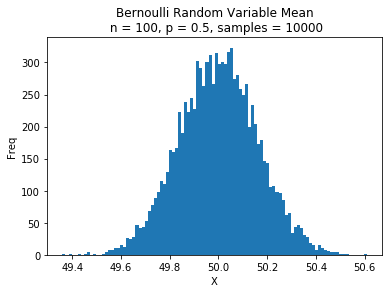

In [30]:
# Take mean of samples from a binomial distribution
N = 10000
X_mean = []
for n in range(N):
    X_mean.append(np.random.binomial(n = 100, p = 0.5, size = 1000).mean())

# Plot the histogram
plt.hist(X_mean, bins = 100)
plt.title('Bernoulli Random Variable Mean\n n = 100, p = 0.5, samples = 10000')
plt.xlabel('X')
plt.ylabel('Freq')
plt.show()

*As can be seen, the Bernoulli Random Variable mean has quickly approach a normal distribution.*

**Answer the following:**
1. **What is a phenomenon associated with the Normal Distribution?**
1. **What are the parameters?**
1. **Is it heavy tailed?**

1. *Human heights, but more broadly speaking, the average of any random phenomenon.*
1. *The parameters are
  - $\mu$: Mean
  - $\sigma^2$: Variance
1. No

### The Exponential Distribution
Exponential Distributions appear in all sorts of contexts in nature, most frequently associated with time events.  In particular, it represents the probability of an event occurring after time interval $x$.  Consider for example, customers enter a store.  At anytime, there is a fixed probability of some one entering.  Therefore, as time passes, it becomes increasingly unlikely that some one has not entered the store in that time interval, at a constantly decaying rate.

The $PDF$ of the exponential distribution is given by

$$f(x;\lambda) = \begin{cases}
\lambda e^{-\lambda x} & x \ge 0, \\
0 & x < 0.
\end{cases}$$

where $\lambda$ is the average time between events and has the shape

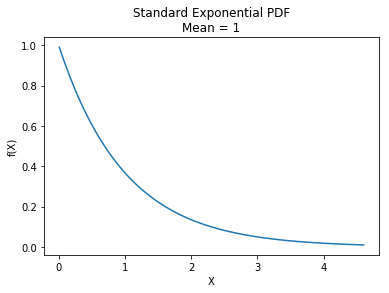

In [31]:
from scipy.stats import expon
X = np.linspace(expon.ppf(0.01), expon.ppf(0.99), 100)
rv = expon()
plt.plot(X, rv.pdf(X))
plt.title('Standard Exponential PDF\nMean = 1')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.show()

It is also worth noting that the expon *memoryless*, meaning that the each event is assumed to be completely independent of the previous and that the probability between events *always* follows the same exponential curve.

**Draw random samples from an Exponential Distribution, construct a histogram, and compute their mean and variance.  Comment on your results.**

In [1]:
# Generate random samples
np.random.seed(0)
X = np.random.exponential(size = 10000, scale = 300)

# Plot
plt.hist(X, density = True, bins = 100)
plt.title('Exponential Distribution\n Mean = 1, samples = 10000')
plt.xlabel('X')
plt.ylabel('Freq')
plt.show()

NameError: name 'np' is not defined

In [ ]:
print('Mean: ' + str(X.mean()))
print('Vairance: ' + str(X.var()))
print('Standard Deviation: ' + str(X.std()))

*It would appear that the mean and standard deviation are equal for the exponential distribution.*

**Suppose at a call center, there are approximately 1000 calls per full working day of 8 hours.  What is the probability that a call will not be recieved in a 5 minute time interval?  State your assumptions.**

*We need to first compute the probability of recieving a call in a minute, and then fit it to an exponential distribution.* 

In [34]:
p_min = 1000/8/60

print('P(X >= 10) = ' + str(1 - expon(loc = 1/p_min).cdf(5)))

P(X >= 10) = 0.0108890236686


*There is only approximately a 1% chance that the call center will not recieve a call in a 5 minute time interval.*

*Our Assumptions are:*
1. *Calls are all independent events.*
1. *The probability of having not received a call decreases at an exponential rate -- i.e. constant*
1. *The frequency of calls does not vary throughout the day.  In other words, our rate parameter is a constant.*

**Answer the following:**
1. **What is a phenomenon associated with the Exponential Distribution?**
1. **What are the parameters?**
1. **Is it heavy tailed?**

1. *And time event in which the mean time between events is constant.  The number of customers entering a store or radioactive decay for example.*
1. *The mean $\lambda$ which in this case is also equal to the standard deviation.*
1. *No.  In fact, heavy tails are often defined by the criteria that if they decay slower than an exponential then they are heavy tailed (not rigorous).*

### The Log-Normal Distribution
A useful heavy tailed distribution is the Log-Normal, furthermore, it has finite mean and variance, making it ideal for many real-world phenomenon.  In short, a random variable $X$ is Log-Normally distributed if $ln(X)$ is Normally distributed.  Or in reverse, sample a Normal Distribution and then $e^x$ is Log-Normally distributed.

The $PDF$ is given by 

$$f(x) = \displaystyle {\frac {1}{x\sigma {\sqrt {2\pi }}}}\ e^{-{\frac {\left(\ln x-\mu \right)^{2}}{2\sigma ^{2}}}}$$

where the parameters are defined as the Normal Distribution from which it is derived.  When actually making a Log-Normal distribution, you will make use of the shape parameter which is the actual variance of the Log-Normal which looks like below.

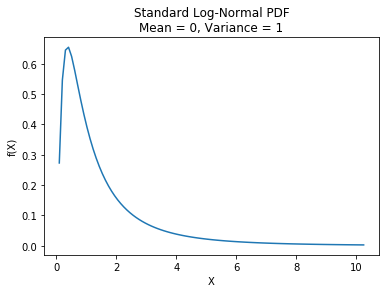

In [35]:
from scipy.stats import lognorm
X = np.linspace(lognorm.ppf(0.01, s = 1), lognorm.ppf(0.99, s = 1), 100)
rv = lognorm(s = 1)
plt.plot(X, rv.pdf(X))
plt.title('Standard Log-Normal PDF\nMean = 0, Variance = 1')
plt.xlabel('X')
plt.ylabel('f(X)')
plt.show()

**Generate some Log-Normal data from a Normal Distribution and plot the histogram**.

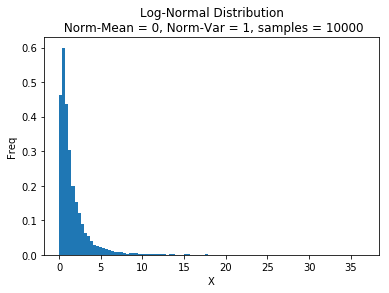

In [36]:
# Generate Random Data
X = np.random.normal(size = 10000)
X = np.exp(X)

# Plot
plt.hist(X, density = True, bins = 100)
plt.title('Log-Normal Distribution\n Norm-Mean = 0, Norm-Var = 1, samples = 10000')
plt.xlabel('X')
plt.ylabel('Freq')
plt.show()

**Answer the following:**
1. **What is a phenomenon associated with the Exponential Distribution?**
1. **What are the parameters?**
1. **Is it heavy tailed?**

1. *Human blood pressure and the amount of time users on the internet spend looking at a comment or joke tends to follow a Log-Normal distribution*
1. *The Log-Normal is defined from the parameters of the Normal Distribution form which it was derived.  However, one can also define it in terms of the variance of the Log-Normal.*
1. *Yes*